<h2> Module 3 Exercises </h2>
<h3> Filipp Krasovsky </h3>

Data Science Using Python and R: Chapter 5 - Page 78: 
<p>Questions #28, 29, 30, 31, 32, 33, & 34</p>
We will be using the churn data set for these exercises. 

In [101]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import random
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [71]:
#read in our churn dataset
wd = "C:/Users/Filipp/Documents/usd_data_sci/502_data mining/module1/Website Data Sets/"
df = pd.read_csv(wd+"churn")
#sanity check
df.head(10)

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False.,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False.,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False.,False


<b>Question 28:</b> Partition the data set, so that 67% of the records are included in the training data set and 33% are included in the test data set. Use a bar graph to confirm your proportions.

<AxesSubplot:xlabel='Cat'>

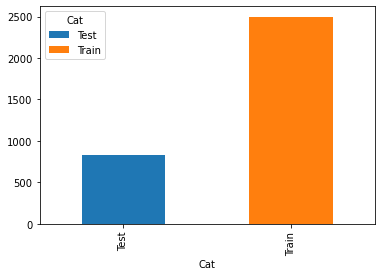

In [72]:
import warnings
warnings.filterwarnings('ignore')
train, test = train_test_split(df, test_size =
0.25, random_state = 7)

train["Cat"] = "Train"
test["Cat"] = "Test"

df_verify = train.append(test)

bargraph_1 = pd.crosstab(df_verify['Cat'],df_verify['Cat'])
bargraph_1.plot(kind='bar',stacked=True)

<b>Question 29</b>

Identify the total number of records in the training data set and how many records in the
training data set have a churn value of true.

In [73]:
#construct a contingency table 
crosstab_02 = pd.crosstab(train['Churn'], train['Churn'])
print(crosstab_02)
print(len(train))

Churn  False  True 
Churn              
False   2145      0
True       0    354
2499


We have 2499 records total, 354 of which have a value of true.

<b>Question 30</b>
Use your answers from the previous exercise to calculate how many true churn records
you need to resample in order to have 20% of the rebalanced data set have true churn
values.

In [74]:
#formula
def resample_size(n,p,rare):
    return(((p*n)-rare)/(1-p))

#we need 183 resamples to get 20%.
resample_size(len(train),0.2,354)

182.25

<b>Question 31</b>
Perform the rebalancing described in the previous exercise and confirm that 20% of the
records in the rebalanced data set have true churn values.

In [82]:
to_resample = train.loc[train['Churn']==True]
our_resample = to_resample.sample(n=841,replace=True)
train_rebal = pd.concat([train,our_resample])

<b>Question 32 </b> Which baseline model do we use to compare our classification model performance
against? To which value does this baseline model assign all predictions? What is the
accuracy of this baseline model?

We use the all negative (ie Churn = false) model as our baseline. This model assigns all predictions to the 
value "no" for churn. Our accuracy depends on whether or not our dataset is rebalanced - if it is, then 
we have 80% accuracy. Otherwise, our baseline model is 86% accurate.

<b>Question 33</b>
Validate your partition by testing for the difference in mean day minutes for the training
set versus the test set.

In [90]:
#pvalue of 61% confirms that we do not have enough evidence to reject the null hypotheses that there is 
#no systematic difference in day mins for our sets
import scipy.stats as stats 
ttest = stats.ttest_ind(train['Day Mins'],test['Day Mins'])
ttest

Ttest_indResult(statistic=-0.505197628593401, pvalue=0.6134534588360927)

<b>Question 34</b> Validate your partition by testing for the difference in proportion of true churn records for the training set versus the test set.

In [94]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([354, 129])
nobs = np.array([len(train), len(test)])
stat, pval = proportions_ztest(count, nobs)

pval

0.35502839108645634

we do not have enough evidence to reject the null hypothesis that there is no systemic difference between our sets for the churn record proportion.

<b>Chapter 7 - Page 109: </b>
<p>Questions #23, 24, 25, 26, 27, 28, 29, & 30</p>
We will be using the churn data set for these exercises. 

In [119]:
train = pd.read_csv(wd + "adult_ch6_training")
test =  pd.read_csv(wd + "adult_ch6_test")
train.head()

,Marital status,Income,Cap_Gains_Losses
0,Never-married,<=50K,0.02174
1,Divorced,<=50K,0.00000
2,Married,<=50K,0.00000
3,Married,<=50K,0.00000
4,Married,<=50K,0.00000


<b>Question 23</b>
Using the training data set, create a C5.0 model (Model 1) to predict a customer’s Income
using Marital Status and Capital Gains and Losses. Obtain the predicted responses.

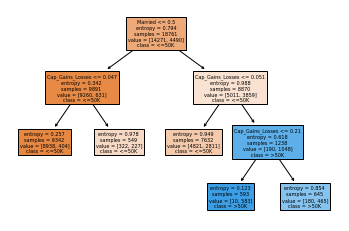

In [120]:
import warnings
warnings.filterwarnings('ignore')
adult_tr = train 
y = adult_tr[['Income']]
mar_np = np.array(adult_tr['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np,drop=True, dictnames = True)

mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

X_names = ["Cap_Gains_Losses", "Divorced", "Married","Never-married","Separated", "Widowed"]

y_names = ["<=50K", ">50K"]
c50_01 = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5).fit(X,y)
tree.plot_tree(c50_01,feature_names=X_names,class_names=y_names,filled="true");

#and now we use this model to predict for our test data.
#first, we transform our marital status to a categorical variable and bind it to our cap gains.
adult_test = test
y = adult_test[['Income']]
mar_np = np.array(adult_test['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np,drop=True, dictnames = True)
mar_cat_pd = pd.DataFrame(mar_cat)
X_test = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

#we can now predict for our test data with our C5 model.
#this returns an array of predicted values.
pred = c50_01.predict(X_test)

#convert our array into a dataframe and combine it with the actual incomes.
pred = pd.DataFrame(pred.tolist(),columns=["predicted"])
actual = pd.DataFrame(adult_test.Income)
results = pd.concat([pred,actual],axis=1)

<b>Question 24</b>
Evaluate Model 1 using the test data set. Construct a contingency table to compare the
actual and predicted values of Income.

In [121]:
#construct a contingency table 
crosstab = pd.crosstab(results['predicted'], results['Income'])
print(crosstab)

Income     <=50K  >50K
predicted             
<=50K       4627  1141
>50K          47   340


<b>Question 25 </b>
For Model 1, recapitulate Table 7.4 from the text, calculating all of the model evaluation
measures shown in the table. Call this table the Model Evaluation Table. Leave space
for Model 2.

In [122]:
results.loc[results['predicted']=='<=50K','predicted']=0
results.loc[results['predicted']=='>50K','predicted']=1
results.loc[results['Income']=='<=50K','Income']=0
results.loc[results['Income']=='>50K','Income']=1

In [133]:
tp = len(results.loc[(results['predicted']==1) & (results['Income']==1)])
fp = len(results.loc[(results['predicted']==1) & (results['Income']==0)])
fn = len(results.loc[(results['predicted']==0) & (results['Income']==1)])
tn = len(results.loc[(results['predicted']==0) & (results['Income']==0)])

In [137]:
#define relevant formulas
def accuracy(tp,tn,fp,fn):
    n = tp+tn+fp+fn
    return((tp+tn)/n)

def sensitivity(TP,FN):
    return (TP/(TP+FN))

def specificity(FP,TN):
    return (TN/(FP+TN))

def precision(TP,FP):
    return (TP/(TP+FP))


def recall(TN,FP):
    return (TN/(TN+FP))


def error_rate(accuracy):
    return (1-accuracy)


def f_1(precision,recall):
    numerator = precision * recall 
    denominator = precision + recall 
    return ( 2 * numerator/denominator)


def f_2(precision,recall):
    numerator = precision * recall 
    denominator = precision + recall 
    return ( 5* (numerator/denominator))

def f_half(precision,recall):
    numerator = precision * recall 
    denominator = precision + recall 
    return ( 1.25 * numerator/denominator)

a = accuracy(tp,tn,fp,fn)
se=sensitivity(tp,fn)
sp=specificity(fp,tn)
p = precision(tp,fp)
r = recall(tn,fp)
er=error_rate(a)
fone = f_1(p,r)
ftwo = f_2(p,r)
fhalf= f_half(p,r)

print(a)
print(se)
print(sp)
print(p)
print(er)
print(fone)
print(ftwo)
print(fhalf)

0.8069861900893582
0.22957461174881835
0.9899443731279418
0.8785529715762274
0.19301380991064176
0.9309283453591608
2.327320863397902
0.5818302158494755


<b>Question 26: </b>
Clearly and completely interpret each of the Model 1 evaluation measures from the Model Evaluation Table.

Accuracy: Ability to correctly identify classes as a fraction of the total 
number of classifications.
Our model was 81% accurate.

Sensitivity: Ability to identify records as positive. Our sensitivity is low,
so we do not do a good job of identifying "positive instances", or cases of high income individuals.

Specificity: Ability to identify records as negative. Our specificity was 
high, so we can identify low income individuals well.

Precision: the proportion of true positives to false positives,
answers which selected items are relevant. our precision 
was fairly high, which means most identified high income individuals were
correctly picked.

error rate: how inaccurate our model was at identifying either income 
class correctly. our error rate is fairly high.

F1,2,0.5: haromic weights of precision and recall.
F1 weighs these equally, F2 weights recall more,
and F0.5 weighs precision more. 

Our model does relatively well when we weigh precision and recall equally,
incredibly well when we weigh recall more than precision (ie, when we care more about low income identification),
and very poorly when we give more weight to high income identification.

<b>Question 27:</b>
Create a cost matrix, called the 3x cost matrix, that specifies a false positive is four times
as bad as a false negative.

In [141]:
cost_matrix_3x = {'<=50K':1,'>50K':3}

<b>Question 28:</b> Using the training data set, build a C5.0 model (Model 2) to predict a customer’s Income using Marital Status and Capital Gains and Losses, using the 3x cost matrix.

In [151]:
adult_tr = train 
y = adult_tr[['Income']]
mar_np = np.array(adult_tr['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np,drop=True, dictnames = True)

mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

X_names = ["Cap_Gains_Losses", "Divorced", "Married","Never-married","Separated", "Widowed"]

y_names = ["<=50K", ">50K"]
c50_02 = DecisionTreeClassifier(criterion="entropy",min_samples_split=75,max_leaf_nodes=5,class_weight=cost_matrix_3x).fit(X,y)

adult_test = test
y = adult_test[['Income']]
mar_np = np.array(adult_test['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np,drop=True, dictnames = True)
mar_cat_pd = pd.DataFrame(mar_cat)
X_test = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

#we can now predict for our test data with our C5 model.
#this returns an array of predicted values.
pred = c50_02.predict(X_test)

#convert our array into a dataframe and combine it with the actual incomes.
pred = pd.DataFrame(pred.tolist(),columns=["predicted"])
actual = pd.DataFrame(adult_test.Income)
results = pd.concat([pred,actual],axis=1)

<b>Question 29:</b> Evaluate your predictions from Model 2 using the actual response values from the test data set. Add Overall Model Cost and Profit per Customer to the Model Evaluation Table. Calculate all the measures from the Model Evaluation Table.

In [152]:
results.loc[results['predicted']=='<=50K','predicted']=0
results.loc[results['predicted']=='>50K','predicted']=1
results.loc[results['Income']=='<=50K','Income']=0
results.loc[results['Income']=='>50K','Income']=1

tp = len(results.loc[(results['predicted']==1) & (results['Income']==1)])
fp = len(results.loc[(results['predicted']==1) & (results['Income']==0)])
fn = len(results.loc[(results['predicted']==0) & (results['Income']==1)])
tn = len(results.loc[(results['predicted']==0) & (results['Income']==0)])

overall_cost = (tn*0)+(fp*4)+(fn*1)+(tp*0)
profit_per_customer = -1 * overall_cost / len(test)

a = accuracy(tp,tn,fp,fn)
se=sensitivity(tp,fn)
sp=specificity(fp,tn)
p = precision(tp,fp)
r = recall(tn,fp)
er=error_rate(a)
fone = f_1(p,r)
ftwo = f_2(p,r)
fhalf= f_half(p,r)

print(a)
print(se)
print(sp)
print(p)
print(er)
print(fone)
print(ftwo)
print(fhalf)
print(overall_cost)
print(profit_per_customer)

0.7104792851340374
0.8993923024983119
0.6506204535729568
0.44924114671163573
0.28952071486596265
0.5314950145755247
1.3287375364388119
0.33218438410970297
6681
-1.0854589764419171


<b>Question 30:</b> Compare the evaluation measures from Model 1 and Model 2 using the 3x cost matrix. Discuss the strengths and weaknesses of each model.


M1 outperforms on accuracy, specificity, precision, error rate, and all three harmonic means.
M2 outperforms on sensitivity. 
In this instance, the ability to avoid false positives is paramount due to our error costs (ie income>50k).
Therefore, precision is key. M1 is the better model.

<h3>Chapter 8 - Page 126: Questions #31, 32, 33, & 34</h3>
For the following exercises, work with the framingham_nb_training and framingham_nb_test data sets. 
Use either Python or R to solve each problem.

In [172]:
train = pd.read_csv(wd+"framingham_nb_training.csv")
test =  pd.read_csv(wd+"framingham_nb_test.csv")

# get tabulation for probabilities 
t1 = pd.crosstab(train['Death'], train['Sex'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
print(t1)

t1 = pd.crosstab(train['Death'], train['Educ'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
print(t1)


Sex      1    2  Total
Death                 
0      184  266    450
1      308  242    550
Total  492  508   1000
Educ     1    2    3   4  Total
Death                          
0      173  146   84  47    450
1      287  135   80  48    550
Total  460  281  164  95   1000


<b>31:</b> Run the Naïve Bayes classifier to classify persons as living or dead based on sex and
education.

In [178]:
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

In [181]:
#categorize 
X_Sex_ind = np.array(train['Sex'])
(X_Sex_ind , X_Sex_ind_dict) = stattools.categorical(X_Sex_ind,drop=True, dictnames = True)
X_Sex_ind = pd.DataFrame(X_Sex_ind)
X_Educ_ind = np.array(train['Educ'])
(X_Educ_ind , X_Educ_ind_dict) = stattools.categorical(X_Educ_ind,drop=True, dictnames = True)
X_Educ_ind = pd.DataFrame(X_Educ_ind)
X = pd.concat((X_Sex_ind, X_Educ_ind), axis = 1)

#Finally, we move on to the Naïve Bayes algorithm.
Y = train.Death
nb_01 = MultinomialNB().fit(X, Y)

In [183]:
#test data 
X_Sex_ind = np.array(test['Sex'])
(X_Sex_ind , X_Sex_ind_dict) = stattools.categorical(X_Sex_ind,drop=True, dictnames = True)
X_Sex_ind = pd.DataFrame(X_Sex_ind)
X_Educ_ind = np.array(test['Educ'])
(X_Educ_ind , X_Educ_ind_dict) = stattools.categorical(X_Educ_ind,drop=True, dictnames = True)
X_Educ_ind = pd.DataFrame(X_Educ_ind)
X_test = pd.concat((X_Sex_ind, X_Educ_ind), axis = 1)

#predict based on test data and generate contingency table for prediction 
Y_predicted = nb_01.predict(X_test)

<b>32.</b>

Evaluate the Naïve Bayes model on the framingham_nb_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

In [184]:
ypred = pd.crosstab(test['Death'], Y_predicted,
rownames = ['Actual'],
colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] =ypred.sum()
ypred

Predicted,0,1,Total
Actual,,,
0,203,322,525
1,105,370,475
Total,308,692,1000


<b>33:</b>According to your table in the previous exercise, find the following values for the Naïve
Bayes model:
a. Accuracy
b. Error rate


In [190]:
tn = ypred[0][0]
tp = ypred[1][1]
fn = ypred[0][1]
fp = ypred[1][0]

a = accuracy(tp,tn,fn,fp)
print(a)
print(1-a)

0.573
0.42700000000000005


<b>34:</b>According to your contingency table, find the following values for the Naïve Bayes model:
<p>a. How often it correctly classifies dead persons.
b. How often it correctly classifies living persons.</p>

In [192]:
#a
print(tp/len(test))
#b
print(tn/len(test))

0.37
0.203
